# Testing DeepSeek's ability to generate data sets

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import re
import math

In [58]:
dsDF = pd.read_csv("../LLM_Generated/DeepSeek/10Countries.csv")
compDF = pd.read_csv("../completeDatasets/pricesComplete.csv")

In [59]:
# dsDF.info()
# compDF.info()

for col in ["acceptanceRate", "percOfIntStud"]:
    dsDF[col] = dsDF[col].str.replace('%', '', regex=False).astype(float)

merged_df = dsDF.merge(compDF, on="university", suffixes=("_df1", "_df2"))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   university            117 non-null    object 
 1   ranking_df1           117 non-null    int64  
 2   tuition_df1           117 non-null    int64  
 3   percOfIntStud_df1     117 non-null    float64
 4   acceptanceRate_df1    117 non-null    float64
 5   safetyIndex_df1       117 non-null    int64  
 6   livingCost_df1        117 non-null    int64  
 7   rentCost_df1          117 non-null    int64  
 8   groceriesCost_df1     117 non-null    int64  
 9   recreationCost_df1    117 non-null    int64  
 10  healthcareCost_df1    117 non-null    int64  
 11  transportCost_df1     117 non-null    int64  
 12  link_df1              117 non-null    object 
 13  Computer Science_df1  117 non-null    int64  
 14  Business_df1          117 non-null    int64  
 15  Economics_df1         1

## Linear regression

In [60]:
regressor = LinearRegression()
r2_scores = {}

## Ranking

Column: ranking
  Slope: 0.9191
  Intercept: 274.7873
  R² Score: 0.5164



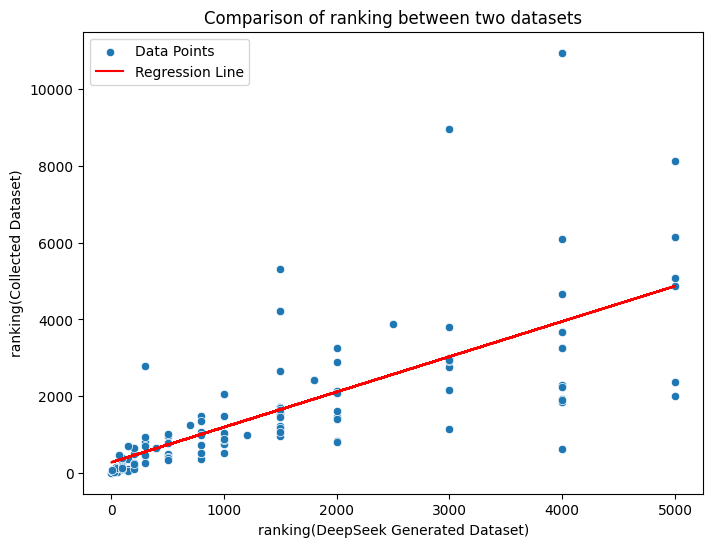

In [61]:
column = "ranking"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Tuition

Column: tuition
  Slope: 0.7348
  Intercept: 2440.5727
  R² Score: 0.5071



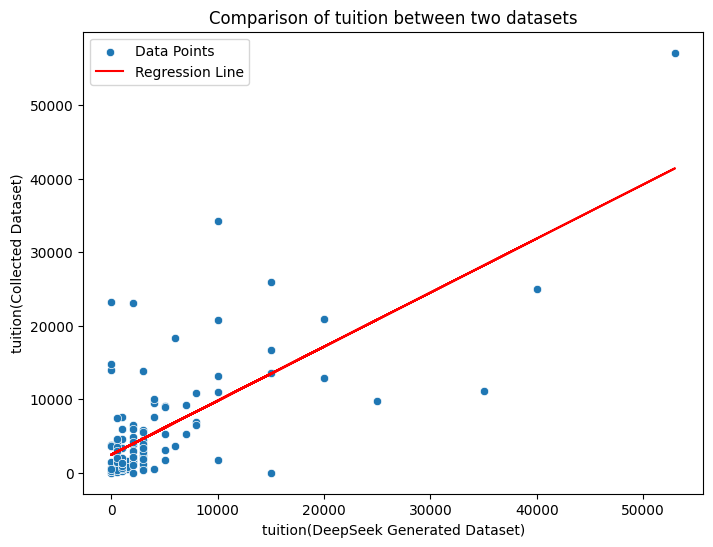

In [62]:
column = "tuition"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Percentage of international students

Column: percOfIntStud
  Slope: 0.6638
  Intercept: 3.0771
  R² Score: 0.4269



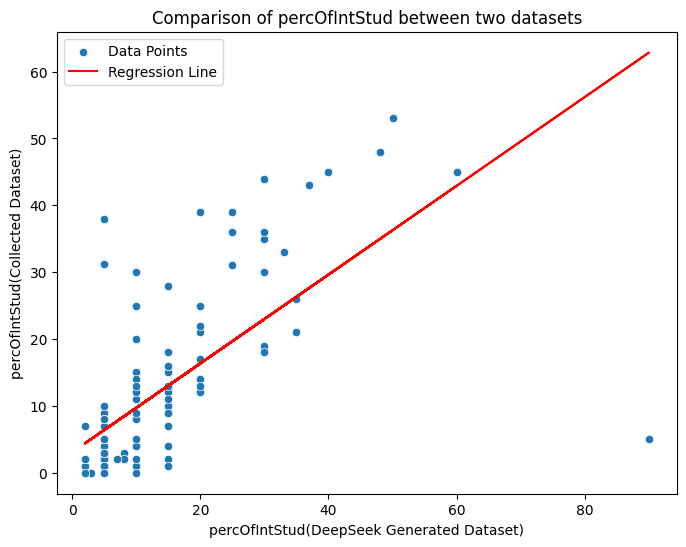

In [63]:
column = "percOfIntStud"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Acceptance rate

Column: acceptanceRate
  Slope: 0.3703
  Intercept: 24.4867
  R² Score: 0.1173



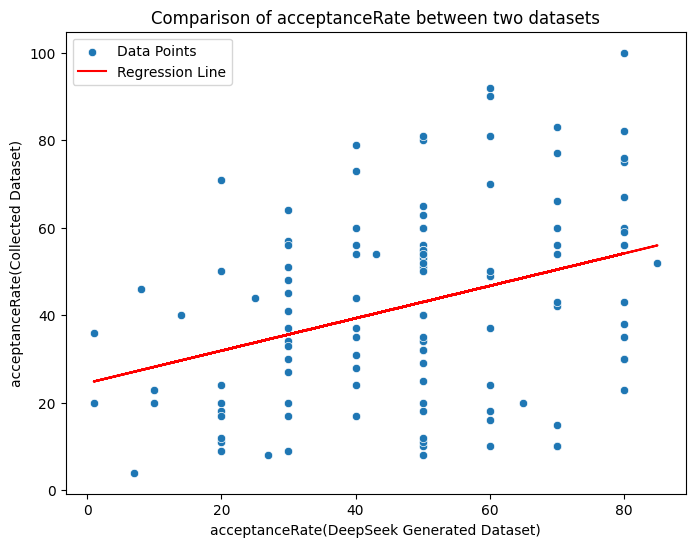

In [64]:
column = "acceptanceRate"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of living

Column: livingCost
  Slope: 0.6105
  Intercept: 320.1623
  R² Score: 0.6399



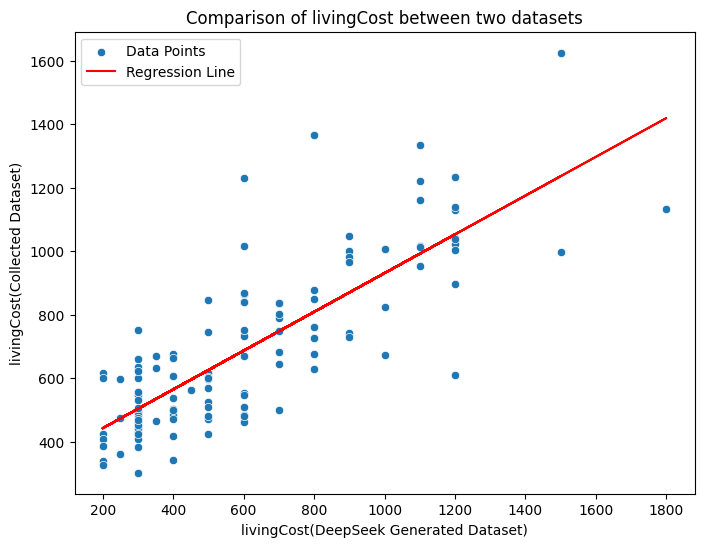

In [65]:
column = "livingCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of rent

Column: rentCost
  Slope: 1.3099
  Intercept: 125.0106
  R² Score: 0.6163



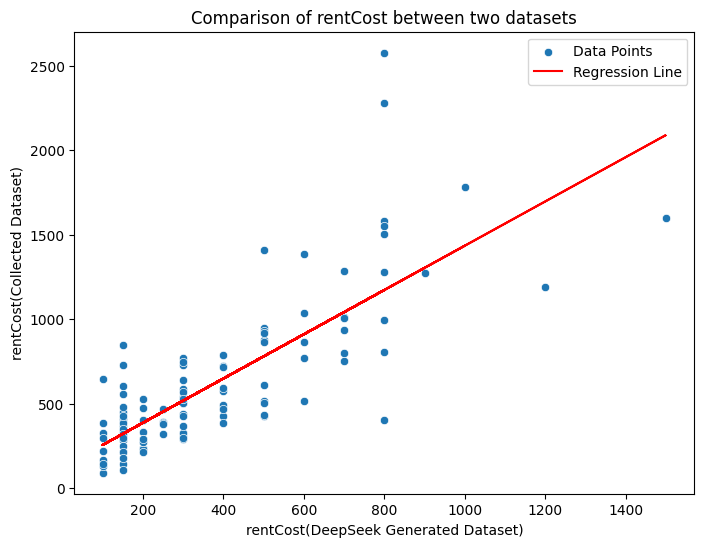

In [66]:
column = "rentCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of groceries

Column: groceriesCost
  Slope: 0.9489
  Intercept: 74.0773
  R² Score: 0.4956



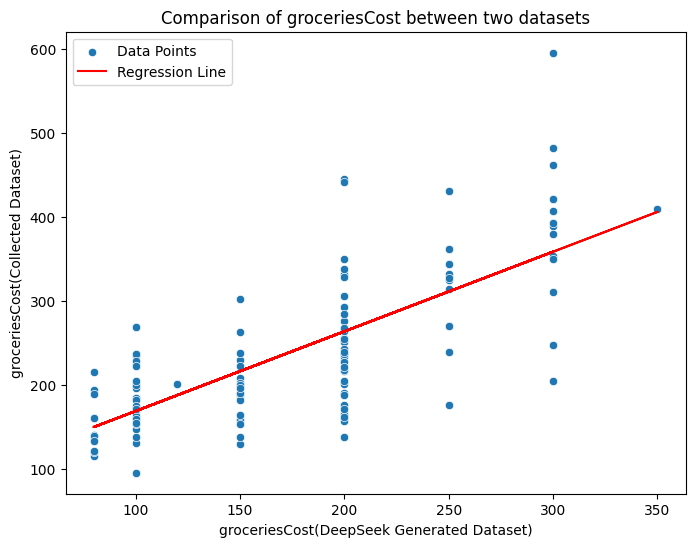

In [67]:
column = "groceriesCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of recreation

Column: recreationCost
  Slope: 0.4663
  Intercept: 22.5277
  R² Score: 0.5685



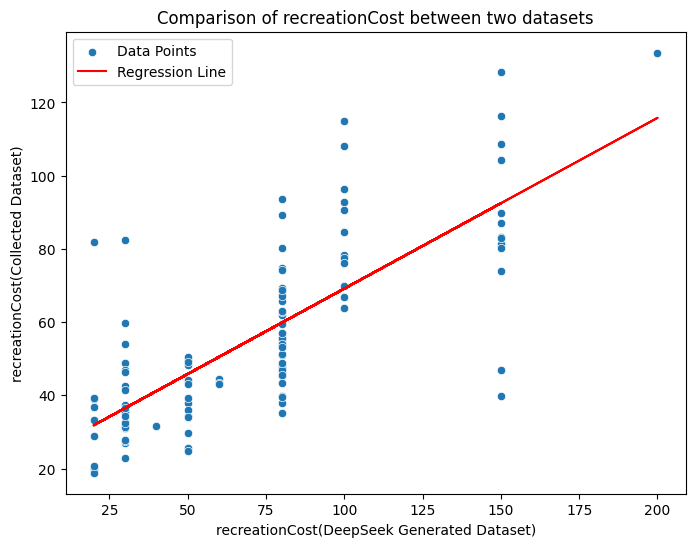

In [68]:
column = "recreationCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Healthcare cost

Column: healthcareCost
  Slope: 1.3514
  Intercept: 131.9492
  R² Score: 0.2565



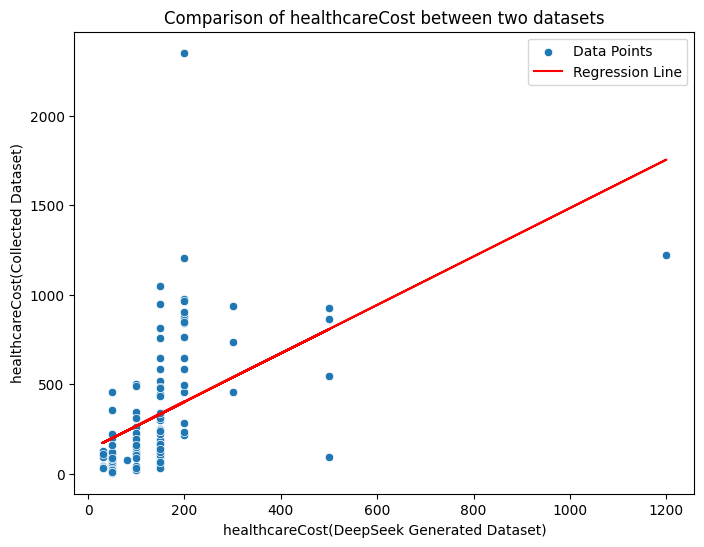

In [69]:
column = "healthcareCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()

## Cost of transportation

Column: transportCost
  Slope: 0.9121
  Intercept: 6.0893
  R² Score: 0.5790



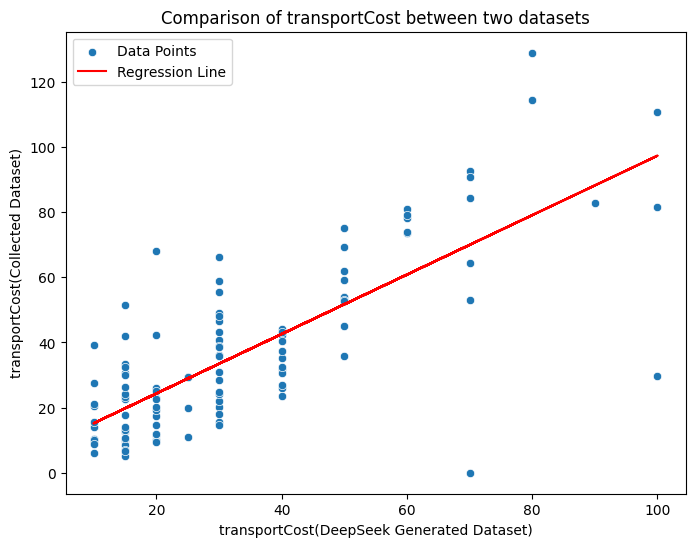

In [70]:
column = "transportCost"

X_init = merged_df[[column + '_df1']].values
y_init = merged_df[column + '_df2'].values

X = list()
y = list()
columnX = list()
columnY = list()
for index in range(len(X_init)):
    if math.isnan(X_init[index][0]) or math.isnan(y_init[index]):
        continue
    else:
        X.append(X_init[index])
        y.append(y_init[index])
        columnX.append(X_init[index][0])
        columnY.append(y_init[index])
        
regressor.fit(X, y)
y_pred = regressor.predict(X)

r2 = r2_score(y, y_pred)
r2_scores[column] = r2

print(f"Column: {column}")
print(f"  Slope: {regressor.coef_[0]:.4f}")
print(f"  Intercept: {regressor.intercept_:.4f}")
print(f"  R² Score: {r2:.4f}\n")

plt.figure(figsize=(8, 6))
sns.scatterplot(x= columnX , y = columnY, label='Data Points')
plt.plot(columnX, y_pred, color='red', label='Regression Line')

plt.xlabel(column + "(DeepSeek Generated Dataset)")
plt.ylabel(column + "(Collected Dataset)")
plt.title("Comparison of " + column + " between two datasets")
plt.legend()
plt.show()